# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [19]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as st
import statsmodels.stats.api as sms

C:\Users\Aluya\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Aluya\Anaconda\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


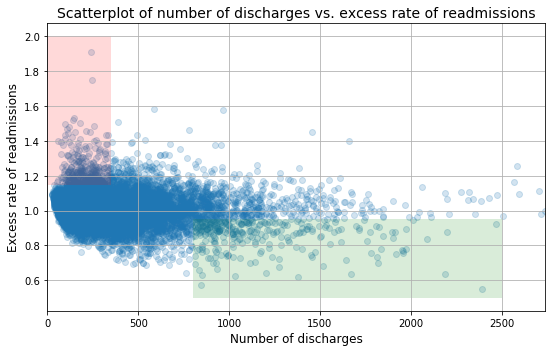

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

In [13]:
clean_df = clean_hospital_read_df
clean_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D8AC5D160>]],
      dtype=object)

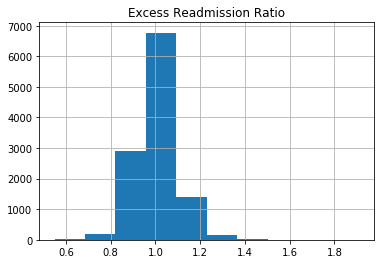

In [14]:
pd.DataFrame.hist(clean_df, column='Excess Readmission Ratio')

### We have determined that the distribution of the Excess readmission ratio is normal.

In [15]:
# we clean the data further to remove NaN values
clean_df = clean_df[np.logical_not(clean_df['Excess Readmission Ratio'].isnull())]
print('Number of samples: {}'.format(len(clean_df)))
print('Mean excess readmission ratio: {:.4f}'.format(clean_df['Excess Readmission Ratio'].mean()))

Number of samples: 11497
Mean excess readmission ratio: 1.0075


## Statistical Analysis

In [17]:
# We inspect the statistical claims made in the previous analysis above.

df_less_than_100 = clean_df[(clean_df['Number of Discharges'] < 100) & (clean_df['Number of Discharges'] > 0)]
print('Number of hospitals with < 100 discharges: {}'.format(len(df_less_than_100)))
print('Mean excess readmission rate: {:.3f}'.format(df_less_than_100['Excess Readmission Ratio'].mean()))
print('Percent excess readmission rate > 1: {:.2f}%'.format((len(df_less_than_100[df_less_than_100['Excess Readmission Ratio'] > 1]) 
                                                             / len(df_less_than_100)) * 100))

df_greater_than_1000 = clean_df[clean_df['Number of Discharges'] > 1000]
print('\nNumber of hospitals with > 1000 discharges: {}'.format(len(df_greater_than_1000)))
print('Mean excess readmission rate: {:.3f}'.format(df_greater_than_1000['Excess Readmission Ratio'].mean()))
print('Percent excess readmission rate > 1: {:.2f}%'.format((len(df_greater_than_1000[df_greater_than_1000['Excess Readmission Ratio'] > 1]) / len(df_greater_than_1000)) * 100))

Number of samples with < 100 discharges: 1188
Mean excess readmission rate: 1.023
Percent excess readmission rate > 1: 63.22%

Number of samples with > 1000 discharges: 463
Mean excess readmission rate: 0.978
Percent excess readmission rate > 1: 44.49%


### As shown in the previous analysis, the number of hospitals with less than 100 discharges, the mean excess readmission rate is 1.023 and 63% of them have readmission rates greater than 1.

### Also, the number of hospitals with over a thousand discharges have mean excess readmission rate is 0.978 and 44% of the hospitals have a readmission rate less than 1.

### We then prove the hypothesis that the mean readmission rate for hospitals with less than 100 discharges is greater than hospitals with over 1000 discharges.

#### H0: ($M$< 100) = ($M$> 1000) 
#### H1: ($M$< 100) < ($M$> 1000) 


In [21]:
two_sample = st.ttest_ind(df_less_than_100['Excess Readmission Ratio'], 
                          df_greater_than_1000['Excess Readmission Ratio'])
cm = sms.CompareMeans(sms.DescrStatsW(df_less_than_100['Excess Readmission Ratio']), 
                      sms.DescrStatsW(df_greater_than_1000['Excess Readmission Ratio']))

print('The 99% confidence interval about the mean difference is ({:.3f}, {:.3f}).'.format(cm.tconfint_diff(alpha = 0.01, usevar='unequal')[0],
                                                                                          cm.tconfint_diff(alpha = 0.01, usevar='unequal')[1]))
print('The t-statistic is %.3f and the p-value is %.10f.' % two_sample)

The 99% confidence interval about the mean difference is (0.029, 0.059).
The t-statistic is 10.061 and the p-value is 0.0000000000.


##### After finding the 99% confidence interval, t-statistic, and p-value of the one-tailed two sample t-test, we can reject the null hypothesis that the mean excess readmission rate for hospitals with less than 100 discharges is equal to the mean excess readmission rate for hospitals with greater than 1000 discharges. We are 99% confident that the true mean difference lies between 0.029% and 0.059%.

## Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

##### The two analysis conducted show that there is a statistical difference between the mean excess readmission rates between different levels of hospital discharge. However, the difference is not practically significant which indicates that there is a correlation between these measures but not big enough. 

##### The conclusions in the preliminary report are misleading because of this lack of practical significance. Thus, the policy recommendation changes because Higher discharge rates may imply a smaller hospital, but it this is not necessarily true. If the above were practially significant, hospital size instead of discharge rates should be used to identify hospitals that need to demonstrate upgraded resource allocation. The initial dataset did not show hospital size so we did not have the whole picture. In addition, the second policy recommendation in the preliminary report is also vetoed because off the misleading information presented.

## Based on the scatterplot above:What are the advantages and disadvantages of using this plot to convey information?

### Advantages:

##### The plot is good looking and easy to read for the amount of information present.
##### The plot uses colors to provide distinct regions that show areas of focus.

### Disadvantages:

##### It gives too much information only to draw simple conclusions.
##### The plot misleads the reader to what trends are actually happening

### The plot below conveys the data in a more direct manner than the preliminary report

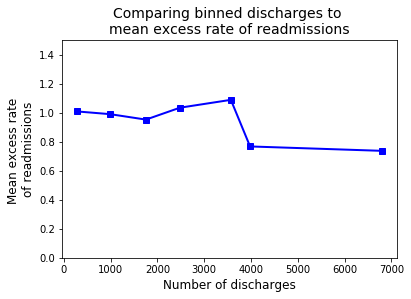

In [23]:
# Bin the data frame by 'Number of Discharges' with 10 bins
bins = np.linspace(clean_hospital_read_df['Number of Discharges'].min(), 
                   clean_hospital_read_df['Number of Discharges'].max(), 10)
groups = clean_hospital_read_df.groupby(np.digitize(clean_hospital_read_df['Number of Discharges'], bins))

#Plot the binned data by mean excess rate of readmission
plt.plot(groups.aggregate(lambda x: np.mean(x[x > 0.5]))['Number of Discharges'], 
         list(groups.aggregate(lambda x: np.mean(x[x > 0.5]))['Excess Readmission Ratio']),
         color='b', lw=2, marker='s')
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Mean excess rate \nof readmissions', fontsize=12)
plt.title('Comparing binned discharges to \nmean excess rate of readmissions', fontsize=14)
plt.ylim(0,1.5);
